# [Parcelas de dependencia parcial]


https://www.kaggle.com/dansbecker/partial-plots


# Cómo funciona
Al igual que la importancia de la permutación, las gráficas de dependencia parcial se calculan después de que un modelo ha sido ajustado. El modelo se ajusta a datos reales que no han sido manipulados artificialmente de ninguna manera.

En nuestro ejemplo de fútbol, ​​los equipos pueden diferir de muchas maneras. Cuántos pases hicieron, disparos, goles, etc. A primera vista, parece difícil desenredar el efecto de estas características.

Para ver cómo las parcelas parciales separan el efecto de cada característica, comenzamos considerando una sola fila de datos. Por ejemplo, esa fila de datos podría representar un equipo que tuvo la pelota el 50% del tiempo, realizó 100 pases, realizó 10 disparos y marcó 1 gol.

Usaremos el modelo ajustado para predecir nuestro resultado (probabilidad de que su jugador haya ganado el "hombre del partido"). Pero repetidamente modificamos el valor de una variable para hacer una serie de predicciones. Podríamos predecir el resultado si el equipo tuviera la pelota solo el 40% del tiempo. Luego pronosticamos con ellos tener la pelota el 50% del tiempo. Luego pronostique nuevamente para el 60%. Y así. Trazamos resultados pronosticados (en el eje vertical) a medida que nos movemos de valores pequeños de posesión de la pelota a valores grandes (en el eje horizontal).

En esta descripción, usamos solo una fila de datos. Las interacciones entre características pueden hacer que la trama de una sola fila sea atípica. Entonces, repetimos ese experimento mental con múltiples filas del conjunto de datos original, y graficamos el resultado promedio pronosticado en el eje vertical.

# Ejemplo de código
La construcción de modelos no es nuestro enfoque, por lo que no nos enfocaremos en la exploración de datos o el código de construcción de modelos.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('data/cKaggle/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)

En aras de la explicación, nuestro primer ejemplo utiliza un árbol de decisión que puede ver a continuación. En la práctica, usted utilizará modelos más sofisticados para aplicaciones del mundo real.

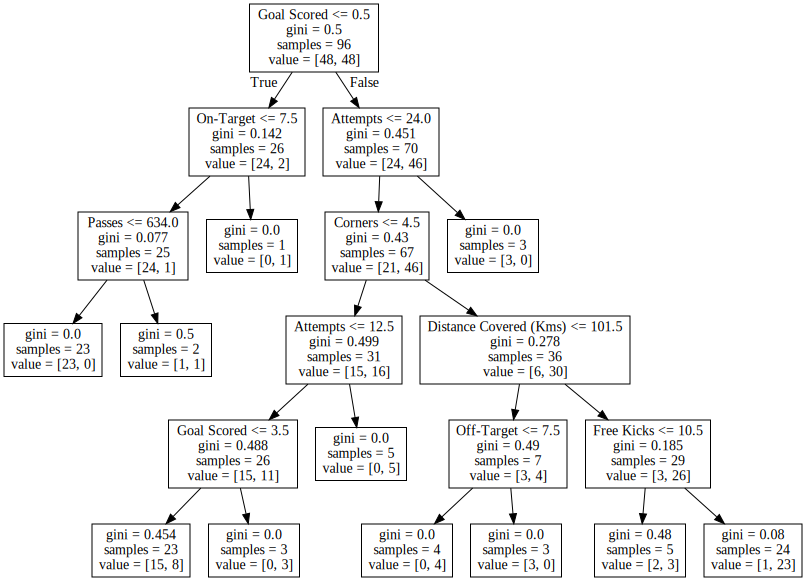

In [2]:
from sklearn import tree
import os 
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

# Como guía para leer el árbol:

Las hojas con hijos muestran su criterio de división en la parte superior
El par de valores en la parte inferior muestra el recuento de valores verdaderos y valores falsos para el objetivo, respectivamente, de puntos de datos en ese nodo del árbol.
Aquí está el código para crear el diagrama de dependencia parcial utilizando la biblioteca PDPBox.

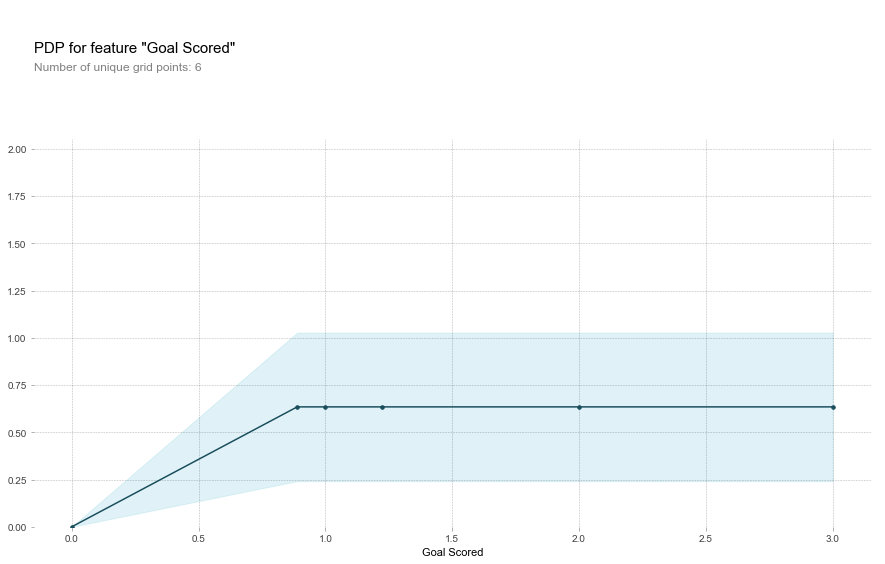

In [7]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature='Goal Scored')

# plot it
pdp.pdp_plot(pdp_goals, 'Goal Scored')

plt.show()

# Vale la pena señalar algunos elementos al interpretar esta trama

El eje y se interpreta como un cambio en la predicción de lo que se predeciría en la línea base o en el valor más a la izquierda.
Un área sombreada en azul indica el nivel de confianza
A partir de este gráfico en particular, vemos que marcar un gol aumenta sustancialmente sus posibilidades de ganar "El hombre del partido". Pero los objetivos adicionales más allá de eso parecen tener poco impacto en las predicciones.

Aquí hay otro ejemplo de trama:

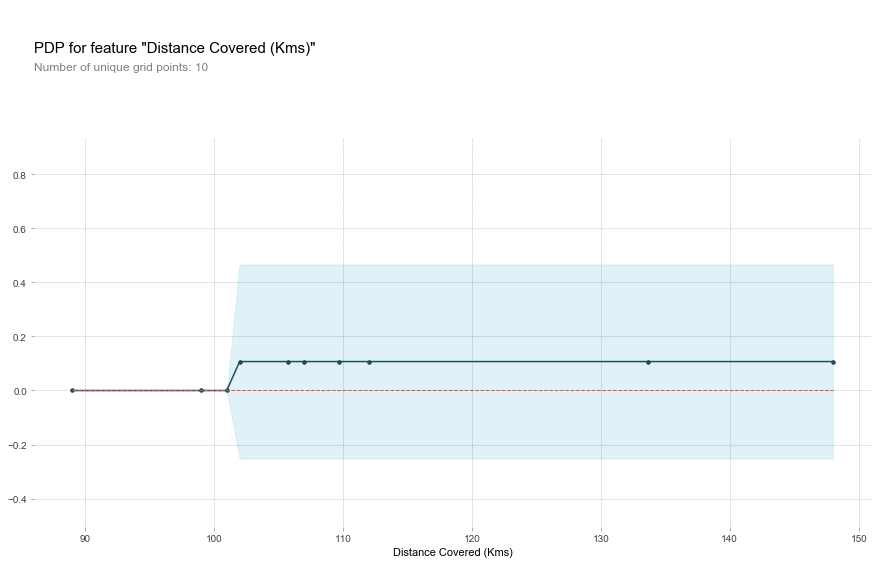

In [4]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)

plt.show()

Este gráfico parece demasiado simple para representar la realidad. Pero eso es porque el modelo es muy simple. Debería poder ver desde el árbol de decisión anterior que esto representa exactamente la estructura del modelo.

Puede comparar fácilmente la estructura o las implicaciones de diferentes modelos. Aquí está la misma trama con un modelo de bosque aleatorio.

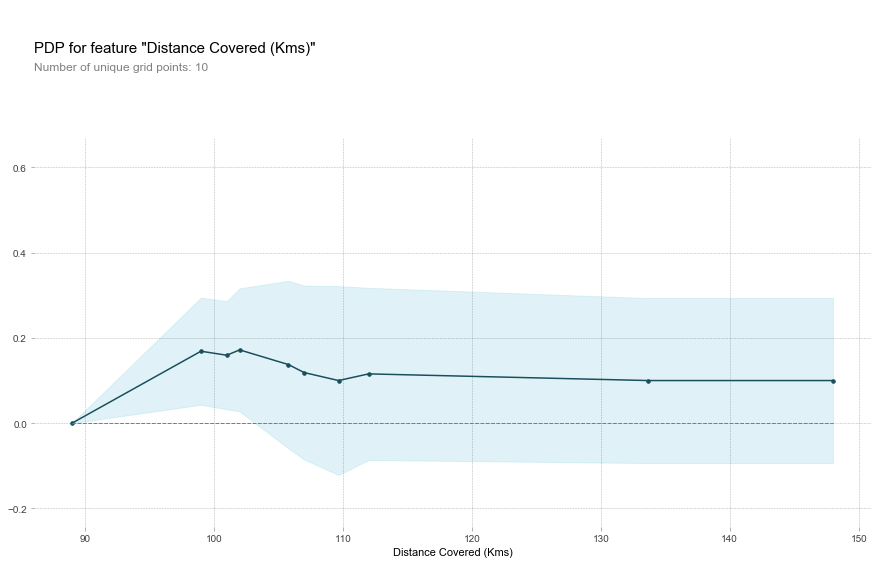

In [5]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

pdp_dist = pdp.pdp_isolate(model=rf_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)

plt.show()

Este modelo cree que es más probable que ganes Man of the Match si tus jugadores corren un total de 100 km en el transcurso del juego. Aunque correr mucho más provoca predicciones más bajas.

En general, la forma suave de esta curva parece más plausible que la función de paso del modelo de Árbol de decisión. Aunque este conjunto de datos es lo suficientemente pequeño como para tener cuidado en cómo interpretamos cualquier modelo.

# Gráficos de dependencia parcial 2D

Si tiene curiosidad acerca de las interacciones entre características, los gráficos de dependencia parcial 2D también son útiles. Un ejemplo puede aclarar esto.

Nuevamente usaremos el modelo de Árbol de decisión para este gráfico. Creará una trama extremadamente simple, pero debería poder hacer coincidir lo que ve en la trama con el árbol mismo.

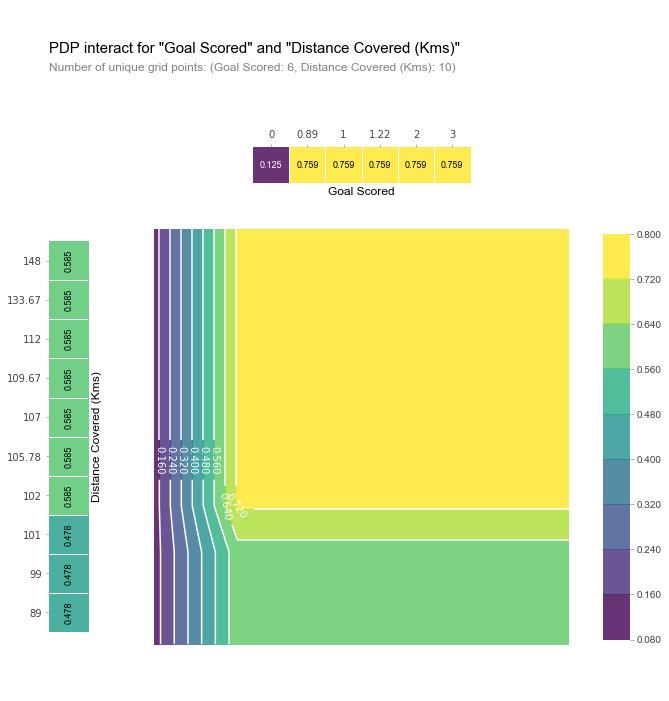

In [8]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1  =  pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_pdp=True)

plt.show()